In [4]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import os, sys
import pickle
curr_dir = sys.path[0]
utils_dir = os.path.join(curr_dir, '..', 'utils_project')
if utils_dir not in sys.path:
    sys.path.append(utils_dir)
from utils_vrp import *

use_sample = False
data_dir = "/home/ecal_team/datasets/amazon_vrp/amazon_processed" if not use_sample else os.path.join(curr_dir, '..', 'dataset')
os.listdir(data_dir)

['amazon_train_N50_I1000_seed1234_S_mini100.pkl',
 'amazon_train_N50_I1000_seed1234_S.pkl',
 'amazon_train_N100_I1000_seed1234_S_mini100.pkl',
 'rnd_N50_I1000_S_seed1234_iter4.pkl',
 'amazon_eval_N20_I1000_seed1234_S.pkl',
 'rnd_N100_I1000_S_seed1234_iter4.pkl',
 'amazon_eval_N50_I1000_seed1234_S.pkl',
 'amazon_eval_N100_I1000_seed1234_S_mini100.pkl',
 'amazon_eval_N20_I1000_seed1234_S_mini100.pkl',
 'rnd_N50_I1000_C_seed1234_iter4.pkl',
 'amazon_train_N20_I1000_seed1234_S.pkl',
 'rnd_N20_I1000_S_seed1234_iter4.pkl',
 'rnd_N20_I1000_seed1234.pkl',
 'amazon_eval_N50_I1000_seed1234_S_mini100.pkl',
 'amazon_eval_N100_I1000_seed1234_S.pkl',
 'amazon_train_N20_I1000_seed1234_S_mini100.pkl',
 'rnd_N100_I1000_seed1234.pkl',
 'amazon_train_N100_I1000_seed1234_S.pkl',
 'amazon_train.pkl',
 'amazon_eval_mini100.pkl',
 'rnd_N100_I1000_C_seed1234_iter4.pkl',
 'amazon_eval.pkl',
 'rnd_N20_I1000_C_seed1234_iter4.pkl',
 'amazon_train_mini100.pkl',
 'rnd_N50_I1000_seed1234.pkl']

In [6]:
def load_data(fn):
    fn = os.path.join(data_dir, fn)
    with open(fn, 'rb') as f:
        data = pickle.load(f)
    return data

In [42]:
data = load_data('rnd_N50_I1000_S_seed1234_iter4.pkl')

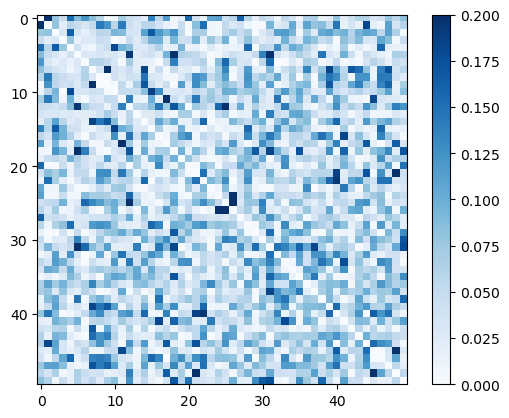

In [24]:
idx = 0
rel_dist = data['rel_distance'][idx]
sym = 0.5 * (rel_dist + rel_dist.T)
asym = abs(rel_dist - rel_dist.T) / sym
cbar = plt.imshow(asym, vmin=0, vmax=0.2, cmap='Blues')
plt.colorbar(cbar)

In [43]:
rel_dist = data['rel_distance'] # (I,N,N)
sym = 0.5 * (rel_dist + rel_dist.transpose(0,2,1))
asym = (rel_dist - rel_dist.transpose(0,2,1)) / sym
lg_sym = np.log(sym)

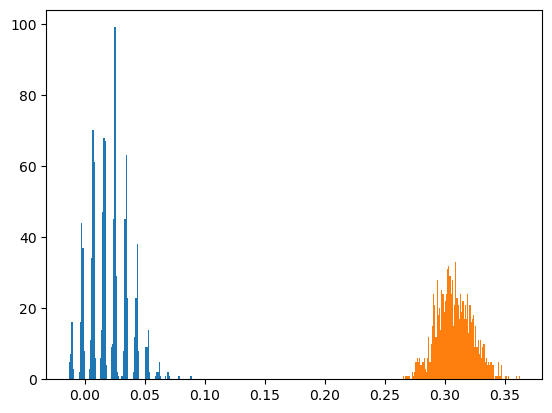

In [44]:
mu_lg_sym = lg_sym.mean(axis=(1,2))
std_lg_sym = lg_sym.std(axis=(1,2))
bins = plt.hist(mu_lg_sym, bins=100)
bins = plt.hist(std_lg_sym, bins=100)

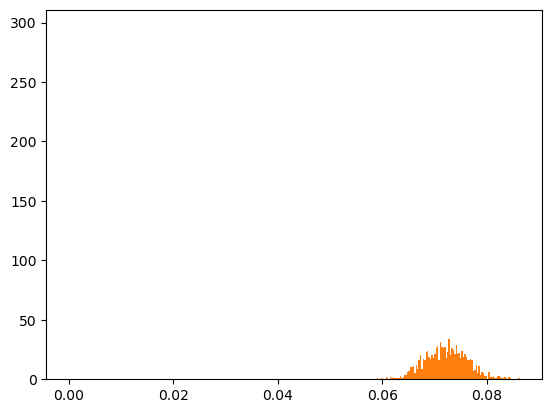

In [37]:
mu_asym = asym.mean(axis=(1,2))
std_asym = asym.std(axis=(1,2))
bins = plt.hist(mu_asym, bins=100)
bins = plt.hist(std_asym, bins=100)

In [ ]:
def low_rank_approx(x):
    u, s, v = torch.svd(x)
    return u, s, v